# Local Functions EDA

In [1]:

import re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io

%matplotlib inline

local_dir = Path('../data/raw/LocalFunctions')
files = sorted(local_dir.glob('*.mat'))

def load_local(path):
    return io.loadmat(path, squeeze_me=True)['localFunctions']


In [2]:

pattern = re.compile(r'u(\d+)s(\d+)')
lengths = []
for fp in files:
    data = load_local(fp)
    n = data.shape[0] if data is not None else 0
    user, session = pattern.search(fp.stem).groups()
    lengths.append({'user': user, 'session': session, 'length': n, 'file': fp.stem})
length_df = pd.DataFrame(lengths)


In [3]:

print(f"Total signatures: {len(length_df)} from {length_df['user'].nunique()} users")
print(length_df["length"].describe())


Total signatures: 11200 from 400 users
count    11200.000000
mean       724.455625
std        655.329478
min         45.000000
25%        325.000000
50%        522.000000
75%        904.250000
max      11819.000000
Name: length, dtype: float64


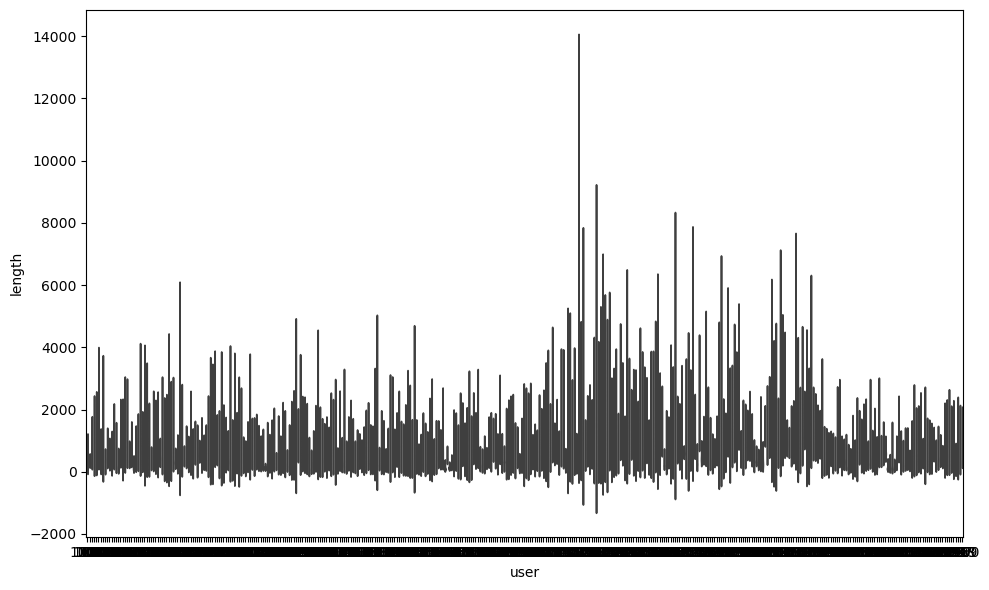

In [4]:

plt.figure(figsize=(10,6))
sns.violinplot(x='user', y='length', data=length_df, inner='quartile')
plt.tight_layout()
plt.savefig('../figures/local_length_violin.png', dpi=300)


In [5]:

summary = length_df.groupby('user')['length'].agg(['mean','std','min','max'])
summary['range'] = summary['max'] - summary['min']
print(summary)


            mean         std  min   max  range
user                                          
1001  399.178571  252.337965  192   969    777
1002  320.928571   79.700796  215   504    289
1003  601.035714  308.656045  399  1467   1068
1004  568.535714  435.802664  321  2002   1681
1005  821.035714  510.294649  420  2059   1639
...          ...         ...  ...   ...    ...
1396  475.607143  410.433406  196  1877   1681
1397  152.357143  172.514565   48   746    698
1398  403.000000  404.352706  176  1992   1816
1399  495.857143  341.043031  271  1794   1523
1400  745.428571  324.898780  460  1756   1296

[400 rows x 5 columns]


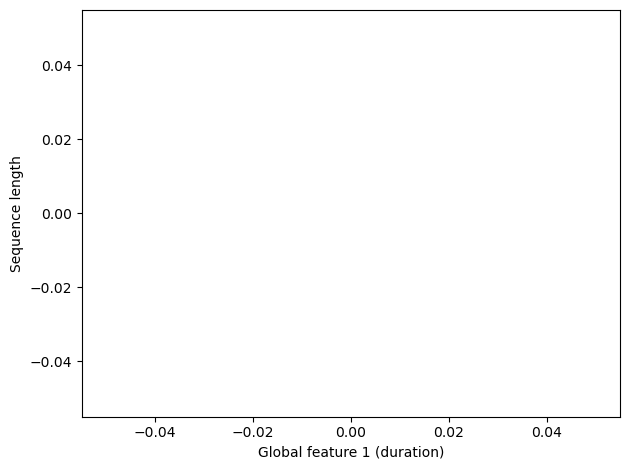

In [6]:

# optional link to global feature (assumes matching filenames exist)
from scipy import io
from pathlib import Path

global_dir = Path('../data/processed/GlobalFeatures')
get_global = lambda stem: io.loadmat(global_dir / f'{stem}.mat', squeeze_me=True)['globalFeatures'][0] if (global_dir / f'{stem}.mat').exists() else np.nan
length_df['duration'] = [get_global(s) for s in length_df['file']]

plt.figure()
sns.scatterplot(x='duration', y='length', data=length_df)
plt.xlabel('Global feature 1 (duration)')
plt.ylabel('Sequence length')
plt.tight_layout()
plt.savefig('../figures/length_vs_duration.png', dpi=300)
